In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src/')
from dataframewrapper import DataFrameWrapper

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
togo_df = pd.read_csv("../data/togo-dapaong_qc.csv")
togo_df

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,NaN
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,NaN
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,NaN


In [3]:
#renaming important columns to avoid confusion 
rename_col = {'GHI': 'global_horizontal_irradiance', 'DNI': 'direct_normal_irradiance', 'DHI': 'diffuse_horizontal_irradiance', 'Tamb': 'ambient_temperature','RH': 'relative_humidity', 'WS': 'wind_speed', 'WD': 'wind_direction', 'TModA':'temp_module_A', 'TModB': 'temp_module_B'}

In [4]:
togo_df = togo_df.rename(columns = rename_col)
#inspecting result
togo_df.head()


,Timestamp,global_horizontal_irradiance,direct_normal_irradiance,diffuse_horizontal_irradiance,ModA,ModB,ambient_temperature,relative_humidity,wind_speed,WSgust,WSstdev,wind_direction,WDstdev,BP,Cleaning,Precipitation,temp_module_A,temp_module_B,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [5]:
togo_df.shape

(525600, 19)

In [6]:
togo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Timestamp                      525600 non-null  object 
 1   global_horizontal_irradiance   525600 non-null  float64
 2   direct_normal_irradiance       525600 non-null  float64
 3   diffuse_horizontal_irradiance  525600 non-null  float64
 4   ModA                           525600 non-null  float64
 5   ModB                           525600 non-null  float64
 6   ambient_temperature            525600 non-null  float64
 7   relative_humidity              525600 non-null  float64
 8   wind_speed                     525600 non-null  float64
 9   WSgust                         525600 non-null  float64
 10  WSstdev                        525600 non-null  float64
 11  wind_direction                 525600 non-null  float64
 12  WDstdev                       

In [7]:
togo_df = togo_df.drop_duplicates()
togo_df.count()

Timestamp                        525600
global_horizontal_irradiance     525600
direct_normal_irradiance         525600
diffuse_horizontal_irradiance    525600
ModA                             525600
ModB                             525600
ambient_temperature              525600
relative_humidity                525600
wind_speed                       525600
WSgust                           525600
WSstdev                          525600
wind_direction                   525600
WDstdev                          525600
BP                               525600
Cleaning                         525600
Precipitation                    525600
temp_module_A                    525600
temp_module_B                    525600
Comments                              0
dtype: int64

In [8]:
#droping column Comments 
togo_df = togo_df.drop(['Comments'], axis=1)

In [9]:
#cleaning negative values I have used 0 to replace the value
togo_df['global_horizontal_irradiance'] = togo_df['global_horizontal_irradiance'].apply(lambda ghi: 0 if ghi < 0 else ghi)
togo_df['diffuse_horizontal_irradiance'] = togo_df['diffuse_horizontal_irradiance'].apply(lambda dhi: 0 if dhi < 0 else dhi)
togo_df['direct_normal_irradiance'] = togo_df['direct_normal_irradiance'].apply(lambda dni: 0 if dni < 0 else dni)

In [10]:
#checking the cleand data
togo_df.sample(10)

,Timestamp,global_horizontal_irradiance,direct_normal_irradiance,diffuse_horizontal_irradiance,ModA,ModB,ambient_temperature,relative_humidity,wind_speed,WSgust,WSstdev,wind_direction,WDstdev,BP,Cleaning,Precipitation,temp_module_A,temp_module_B
290064,2022-05-14 10:25,869.0,601.8,281.5,779.8,768.6,31.9,52.7,4.7,5.9,0.7,240.2,10.7,977,0,0.0,52.2,62.0
427452,2022-08-17 20:13,0.0,0.0,0.0,0.0,0.0,25.7,83.0,1.2,1.6,0.5,208.5,6.8,977,0,0.0,24.2,23.8
201167,2022-03-13 16:48,107.4,0.0,110.4,105.3,96.8,36.6,33.2,1.7,2.4,0.6,54.4,13.0,970,0,0.0,39.8,39.4
467248,2022-09-14 11:29,1099.0,668.9,427.6,1075.0,1059.0,29.1,72.3,1.7,2.4,0.5,327.0,11.1,977,0,0.0,48.0,53.2
14167,2021-11-03 20:08,0.0,0.0,0.0,0.0,0.0,27.2,57.5,0.5,1.4,0.6,159.2,6.2,976,0,0.0,24.5,24.2
167585,2022-02-18 09:06,595.2,604.8,214.7,615.7,574.4,30.3,14.4,3.7,4.6,0.6,12.8,10.3,976,0,0.0,43.6,49.8
189990,2022-03-05 22:31,0.0,0.0,0.0,0.0,0.0,29.5,31.0,1.3,1.6,0.3,71.6,2.1,973,0,0.0,28.4,28.1
35074,2021-11-18 08:35,538.8,686.0,143.9,591.0,568.7,29.7,31.2,1.0,1.6,0.5,94.9,13.4,978,0,0.0,42.5,51.1
14902,2021-11-04 08:23,497.2,517.3,205.3,528.4,498.4,28.2,67.8,3.4,4.1,0.5,262.3,10.2,977,0,0.0,41.0,45.6
421351,2022-08-13 14:32,673.9,349.1,371.8,626.2,620.3,30.4,68.3,1.8,2.7,0.6,12.2,15.9,976,0,0.0,44.7,44.2


# Statistical Analysis

In [11]:
togo_df.describe()

,global_horizontal_irradiance,direct_normal_irradiance,diffuse_horizontal_irradiance,ModA,ModB,ambient_temperature,relative_humidity,wind_speed,WSgust,WSstdev,wind_direction,WDstdev,BP,Cleaning,Precipitation,temp_module_A,temp_module_B
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,231.718786,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,321.691953,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


# Wrapping the dataframe with the custome class

In [12]:
togo_Df = DataFrameWrapper(togo_df)

   ## Weekly Data Solar Radiation GHI, DNI and DHI

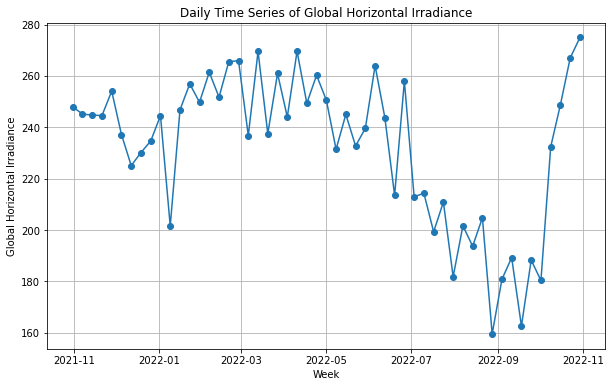

In [13]:
#Global Horizontal Irradiance
togo_Df.plot_weekly_time_series('global_horizontal_irradiance', 'Global Horizontal Irradiance')

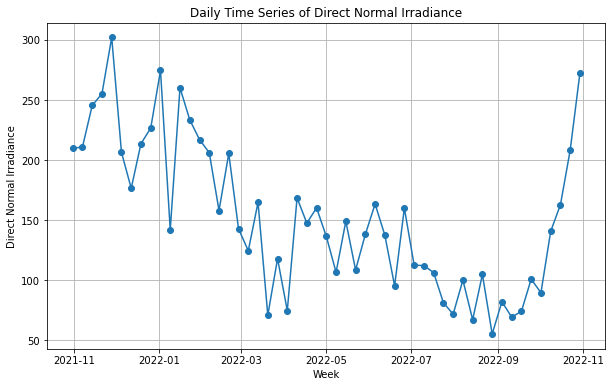

In [14]:
togo_Df.plot_weekly_time_series('direct_normal_irradiance', 'Direct Normal Irradiance')

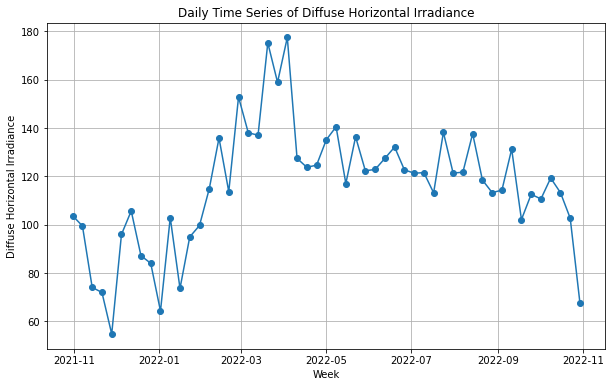

In [15]:
togo_Df.plot_weekly_time_series('diffuse_horizontal_irradiance','Diffuse Horizontal Irradiance')

## Time Series Analysis

## Weekly and Monthly analysis

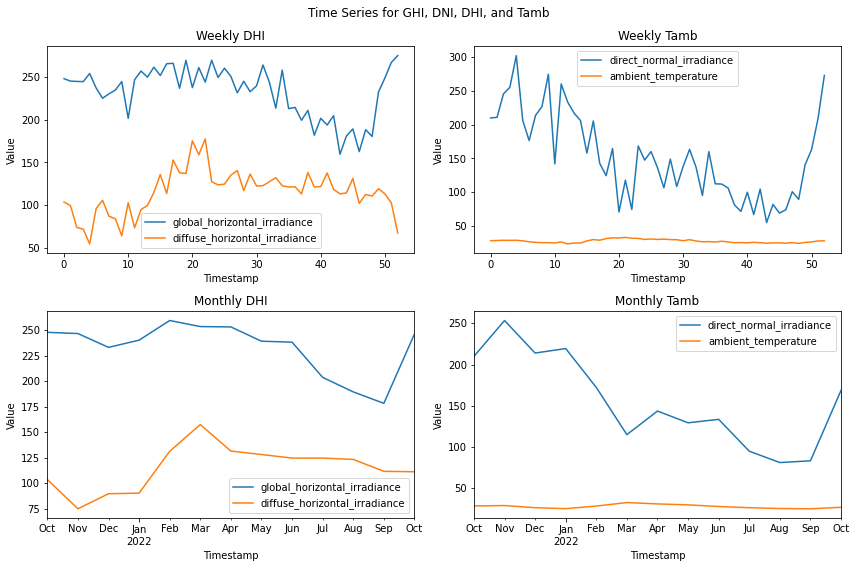

In [16]:
togo_Df.main_time_seris_analysis()

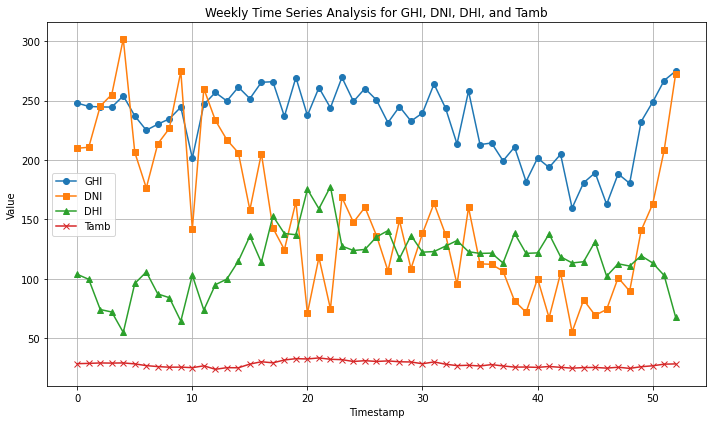

In [17]:
#weekly analsis of main variables
togo_Df.weekly_analysis_of_main_vairables()

## Correlation 

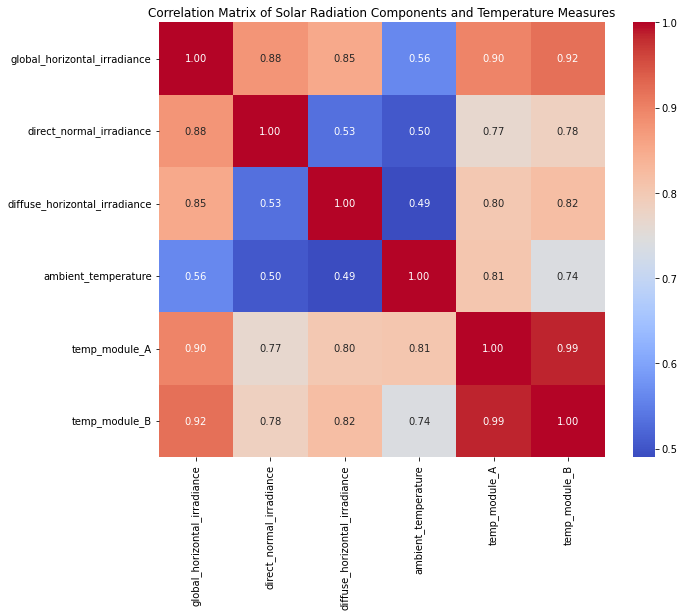

In [18]:
togo_Df.corr_solarRad_temp()

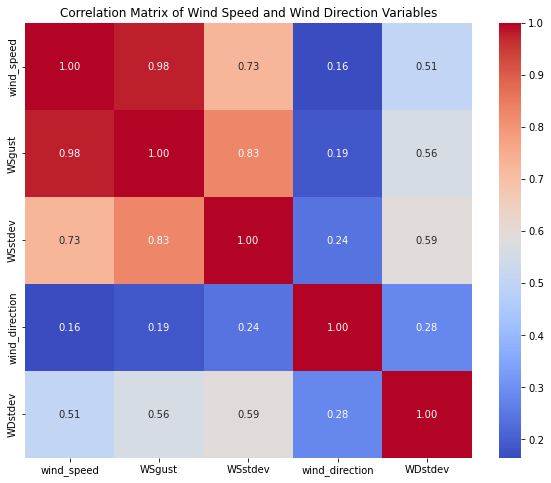

In [19]:
togo_Df.corr_ws_wd()

In [20]:
togo_Df.corr_tamb_tmoa_tmob_by_condition()

Correlation matrix for wind speed 0.0
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.989840             0.734807
temp_module_B             0.989840       1.000000             0.678007
ambient_temperature       0.734807       0.678007             1.000000

Correlation matrix for wind speed 0.1
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.988376             0.791228
temp_module_B             0.988376       1.000000             0.741270
ambient_temperature       0.791228       0.741270             1.000000

Correlation matrix for wind speed 0.2
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A              1.00000       0.990350             0.788420
temp_module_B              0.99035       1.000000             0.737409
ambient_temperature        0.78842       0.737409             1.000000

Correlation matrix for wind spe

                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.966531             0.771456
temp_module_B             0.966531       1.000000             0.655469
ambient_temperature       0.771456       0.655469             1.000000

Correlation matrix for wind speed 4.2
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.964617             0.762036
temp_module_B             0.964617       1.000000             0.644556
ambient_temperature       0.762036       0.644556             1.000000

Correlation matrix for wind speed 4.3
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.966134             0.764635
temp_module_B             0.966134       1.000000             0.648901
ambient_temperature       0.764635       0.648901             1.000000

Correlation matrix for wind speed 4.4
                     temp_modul

                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000        0.99918             0.991783
temp_module_B             0.999180        1.00000             0.990210
ambient_temperature       0.991783        0.99021             1.000000

Correlation matrix for wind speed 10.2
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.998454             0.960418
temp_module_B             0.998454       1.000000             0.946530
ambient_temperature       0.960418       0.946530             1.000000

Correlation matrix for wind speed 10.3
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.997835             0.992903
temp_module_B             0.997835       1.000000             0.984922
ambient_temperature       0.992903       0.984922             1.000000

Correlation matrix for wind speed 10.4
                     temp_mo

Correlation matrix for wind speed 13.7
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.997221             0.972102
temp_module_B             0.997221       1.000000             0.951927
ambient_temperature       0.972102       0.951927             1.000000

Correlation matrix for wind speed 13.9
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A             1.000000       0.987566             0.517766
temp_module_B             0.987566       1.000000             0.645823
ambient_temperature       0.517766       0.645823             1.000000

Correlation matrix for wind speed 14.0
                     temp_module_A  temp_module_B  ambient_temperature
temp_module_A                  NaN            NaN                  NaN
temp_module_B                  NaN            NaN                  NaN
ambient_temperature            NaN            NaN                  NaN

Correlation matrix for wind 

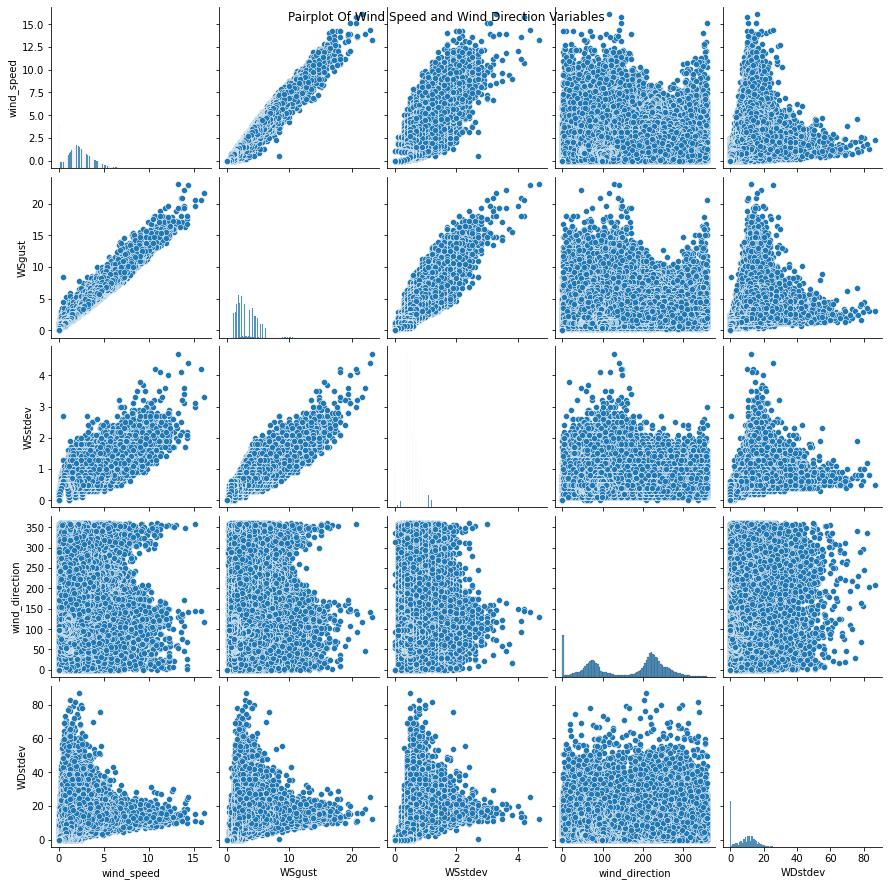

In [21]:
togo_Df.wind_analysis()

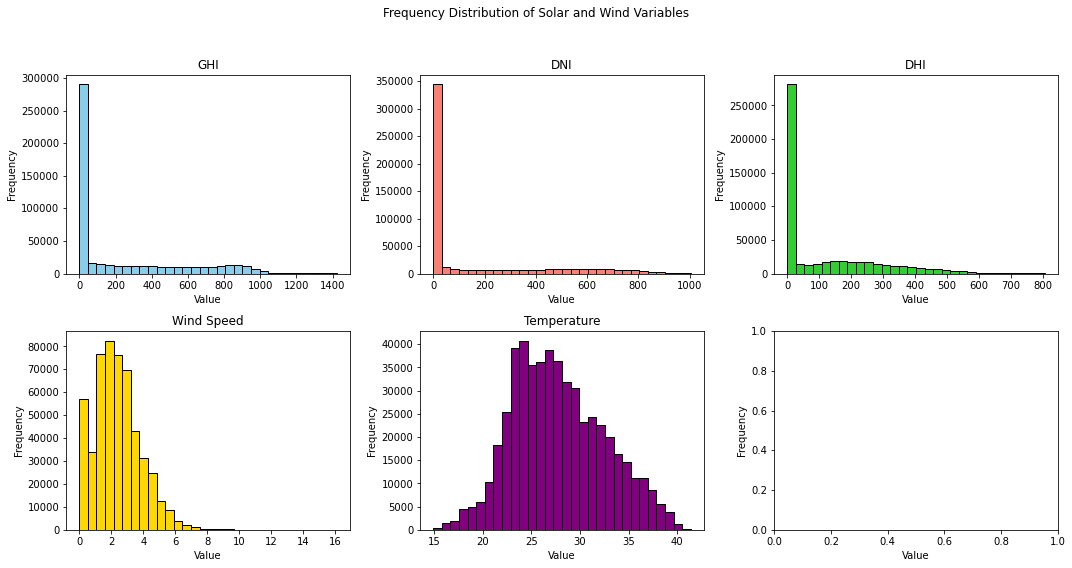

In [22]:
togo_Df.histogram_main_variable()